<h1 style = 'text-align: center;'>Análise Competitiva de Fábricas de Salsichas</h1>


**Denys Santos**


Qual fábrica expandir (+60% de capacidade) e qual encerrar, com base em dados financeiros e operacionais, e justificar com números: 


### Comparativo das Fábricas

| **Característica** | **Fábrica A** | **Fábrica B** | **Fábrica C** |
|--------------------|---------------|---------------|---------------|
| **Capacidade (seg–sex)** | 120 t/dia | 110 t/dia | 100 t/dia |
| **Capacidade (sábados)** | 100 t/dia | 80 t/dia | 50 t/dia |
| **Eficiência** | 80% | 82% | 90% |
| **Descarte** | 2% | 3% | 4% |
| **Custo Fixo Mensal** | R\$ 600.000 | R\$ 550.000 | R\$ 500.000 |
| **ICMS** | 18% | 15% | 16,5% |
| **Investimento para +60%** | R\$ 5.000.000<br>+ 10 pessoas × R\$ 5.000/mês | R\$ 3.000.000<br>+ 22 pessoas × R\$ 5.500/mês | R\$ 2.500.000<br>+ 28 pessoas × R\$ 5.500/mês |

#### Custo Variável por Tonelada (R\$)

| Produto | Fábrica A | Fábrica B | Fábrica C |
|--------|-----------|-----------|-----------|
| **Produto 1** | 180 | 190 | 200 |
| **Produto 2** | 200 | 210 | 220 |
| **Produto 3** | 220 | 230 | 240 |
| **Produto 4** | 240 | 250 | 260 |
| **Produto 5** | 260 | 270 | 280 |

#### Preço de Venda e Frete

| Produto | Preço (R\$) | Frete (R\$) | Mercado |
|--------|-------------|-------------|--------|
| **Produto 1** | 1200 | 30 | Interno |
| **Produto 2** | 1300 | 50 | Exportação |
| **Produto 3** | 1400 | 30 | Interno |
| **Produto 4** | 1500 | 30 | Interno |
| **Produto 5** | 1600 | 50 | Exportação |



> **Demanda Mensal Atual **(total)  
> Produto 1: 1450 t | Produto 2: 1200 t | Produto 3: 800 t | Produto 4: 660 t | Produto 5: 260 t  
> **Previsão**: +10% ao ano → +61% em 5 anos.

### Passo 1: Entender o desempenho atual de cada fábrica

Objetivo. Construir um retrato fiel do estado atual antes de simular crescimento e investimento. Vamos do motor físico ao resultado financeiro em quatro camadas: (1) capacidade comparável, (2) economia unitária, (3) alocação ótima de volumes e (4) P&L por fábrica.

1) Capacidade comparável (entregável)  
Trabalhamos com toneladas vendáveis por mês, já líquidas de eficiência e sucata (descarte). Para cada fábrica f:
$$
\text{CapNominal}_f
= (\text{Cap}_{\text{seg-sex},f}\cdot \text{dias\_úteis})
+ (\text{Cap}_{\text{sáb},f}\cdot \text{sábados})
$$
$$
\text{CapUtil}_f = \text{CapNominal}_f \cdot \text{Eficiência}_f
\qquad
\text{CapEntregável}_f = \text{CapUtil}_f \cdot (1 - \text{Descarte}_f)
$$
Começar por aqui garante que “capacidade” seja comparável entre fábricas e reflita o que de fato pode ser vendido.

2) Economia unitária por fábrica × produto (contribuição unitária)  
Para cada produto p e fábrica f, a contribuição por tonelada entregue é:
$$
\text{Contrib}_{p,f}
=
\underbrace{\text{Preço}_{p}\,(1 - \text{ICMS}_{f})}_{\text{receita líquida}}
-
\underbrace{\text{Frete}_{p}}_{\text{logística}}
-
\underbrace{\frac{\text{CV}_{p,f}}{1 - \text{Descarte}_{f}}}_{\text{CV ajustado pela sucata}}
$$
ICMS depende da **fábrica**; frete depende do **produto** (exportação vs. mercado interno). O custo variável é **ajustado por descarte** porque, para entregar 1 t, é preciso produzir mais do que 1 t:

$$
\text{Produção necessária (t)} \;=\; \frac{1}{1 - \text{Descarte}_f}\;\times\;\text{Entrega (t)}
$$


3) Alocação ótima de volumes (modelo de transporte linear)  
Direcionamos a demanda para as fábricas com maior contribuição, respeitando capacidades. Com variáveis não negativas \(x_{p,f}\) (toneladas do produto p entregues pela fábrica f), o problema fica:

$$
\max_{x_{p,f} \ge 0}\;\; \sum_{p,f} x_{p,f}\,\text{Contrib}_{p,f}
$$

$$
\text{s.a.}\qquad
\sum_{f} x_{p,f} = \text{Demanda}_p \;\;\; \forall\, p,
\qquad
\sum_{p} x_{p,f} \le \text{CapacidadeEntregável}_f \;\;\; \forall\, f.
$$

$$
\max_{x_{p,f}\ge 0}\ \sum_{p,f} \text{Contrib}_{p,f}\,x_{p,f}
$$
sujeito a:
$$
\sum_{f} x_{p,f} = \text{Demanda}_{p}\quad \forall p,
\qquad
\sum_{p} x_{p,f} \le \text{CapEntregável}_{f}\quad \forall f
$$
Interpretando: distribuímos cada tonelada para onde gera mais valor, sem estourar a capacidade vendável.

4) P&L mensal por fábrica (após a alocação ótima)  
Consolidamos Receita, ICMS, Frete, CV ajustado e Fixos por fábrica f:
$$
\text{Receita}_{f} = \sum_{p} x_{p,f}\,\text{Preço}_{p}
\qquad
\text{ICMS}_{f} = \sum_{p} x_{p,f}\,\text{Preço}_{p}\,\text{ICMS}_{f}
$$
$$
\text{Frete}_{f} = \sum_{p} x_{p,f}\,\text{Frete}_{p}
\qquad
\text{CVAdj}_{f} = \sum_{p} x_{p,f}\,\frac{\text{CV}_{p,f}}{1-\text{Descarte}_{f}}
$$
$$
\text{Lucro}_{f}
=
\text{Receita}_{f}
-
\text{ICMS}_{f}
-
\text{Frete}_{f}
-
\text{CVAdj}_{f}
-
\text{Fixos}_{f}
\qquad
\text{Margem}_{f}=\frac{\text{Lucro}_{f}}{\text{Receita}_{f}}
$$

#### Como ler as tabelas deste passo

- **Tabela 1 — Capacidade comparável (entregável) e participação.**  
Mostra a capacidade vendável/mês de cada fábrica e sua participação no total. Base física para discutir escala.

- **Tabela 2 — Contribuição unitária (R$/t entregue) por fábrica × produto.**  
Mostra o unit economics real: preço líquido de ICMS, menos frete e CV ajustado. Indica onde cada fábrica é mais competitiva.

- **Tabela 3 — Alocação ótima de volumes (t/mês) — demanda atual.**  
Mostra a decisão operacional ótima: como distribuir a demanda entre fábricas para maximizar lucro respeitando limites.

- **Tabela 4 — Comparativo financeiro mensal por fábrica (alocação ótima).**  
É o P&L resultante por fábrica: lucro e margem já com fixos.

#### Fórmula guia (visão rápida)
$$
\text{Lucro Líquido}
=
\underbrace{\sum_{p} x_{p,f}\,\text{Preço}_{p}}_{\text{Receita}}
-
\underbrace{\sum_{p} x_{p,f}\,\text{Preço}_{p}\,\text{ICMS}_{f}}_{\text{ICMS}}
-
\underbrace{\sum_{p} x_{p,f}\,\text{Frete}_{p}}_{\text{Frete}}
-
\underbrace{\sum_{p} x_{p,f}\,\frac{\text{CV}_{p,f}}{1-\text{Descarte}_{f}}}_{\text{CV Ajustado}}
-
\underbrace{\text{Fixos}_{f}}_{\text{por fábrica}}
$$


In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from itertools import product

# =============================
# DADOS DE ENTRADA
# =============================
produtos = ['Produto 1', 'Produto 2', 'Produto 3', 'Produto 4', 'Produto 5']
demanda_mensal = pd.Series([1450, 1200, 800, 660, 260], index=produtos)  # t/mês (entregues)
preco_venda = pd.Series([1200, 1300, 1400, 1500, 1600], index=produtos)
frete_por_produto = pd.Series([30, 50, 30, 30, 50], index=produtos)  # 2 e 5 export; demais interno

fabricas = ['A', 'B', 'C']
dias_uteis, sabados = 22, 4

capacidade_seg_sex = pd.Series({'A': 120, 'B': 110, 'C': 100})
capacidade_sab     = pd.Series({'A': 100, 'B': 80,  'C': 50})
eficiencia         = pd.Series({'A': 0.80, 'B': 0.82, 'C': 0.90})
descarte           = pd.Series({'A': 0.02, 'B': 0.03, 'C': 0.04})
custo_fixo         = pd.Series({'A': 600_000, 'B': 550_000, 'C': 500_000})
icms               = pd.Series({'A': 0.18, 'B': 0.15, 'C': 0.165})
custo_var = pd.DataFrame({
    'A': [180, 200, 220, 240, 260],
    'B': [190, 210, 230, 250, 270],
    'C': [200, 220, 240, 260, 280]
}, index=produtos)

# =============================
# CAPACIDADE ENTREGÁVEL (comparável entre fábricas)
# =============================
cap_nominal    = (capacidade_seg_sex * dias_uteis) + (capacidade_sab * sabados)  # t/mês
cap_util       = cap_nominal * eficiencia                                        # t/mês úteis
cap_entregavel = cap_util * (1 - descarte)                                       # t/mês vendáveis

df_capacidade = pd.DataFrame({
    'Capacidade Nominal (t/mês)': cap_nominal.round(1),
    'Eficiência': eficiencia,
    'Descarte': descarte,
    'Capacidade Entregável (t/mês)': cap_entregavel.round(1)
})
df_capacidade['Participação na Capacidade'] = (cap_entregavel / cap_entregavel.sum()).map(lambda x: f"{x:.2%}")

# =============================
# CONTRIBUIÇÃO UNITÁRIA por (fábrica, produto)
# preço líquido de ICMS − frete − CV ajustado pela sucata
# =============================
rev_liq = pd.DataFrame({f: preco_venda * (1 - icms[f]) for f in fabricas})     # R$/t
cv_aj   = pd.DataFrame({f: custo_var[f] / (1 - descarte[f]) for f in fabricas})# R$/t entregue
contrib = rev_liq.subtract(frete_por_produto, axis=0).subtract(cv_aj, axis=0)  # R$/t

# =============================
# ALOCAÇÃO ÓTIMA SIMPLES (greedy) para a DEMANDA ATUAL
# max sum contrib * x  s.a.  soma_f x_pf = demanda_p; soma_p x_pf <= cap_f; x>=0
# =============================
dem_left = demanda_mensal.copy().astype(float)
cap_left = cap_entregavel.copy().astype(float)
alloc    = pd.DataFrame(0.0, index=produtos, columns=fabricas)

arcos = [(p, f, contrib.loc[p, f]) for p, f in product(produtos, fabricas)]
arcos.sort(key=lambda t: t[2], reverse=True)  # maior contribuição primeiro

for p, f, c in arcos:
    if dem_left[p] <= 0 or cap_left[f] <= 0:
        continue
    x = min(dem_left[p], cap_left[f])
    alloc.loc[p, f] += x
    dem_left[p]     -= x
    cap_left[f]     -= x

demanda_nao_atendida = dem_left.sum()

# =============================
# P&L MENSAL por fábrica (com base na alocação ótima)
# =============================
receita   = (alloc.mul(preco_venda, axis=0)).sum(axis=0)
icms_val  = (alloc.mul(preco_venda, axis=0).mul(icms, axis=1)).sum(axis=0)
frete_val = (alloc.mul(frete_por_produto, axis=0)).sum(axis=0)
cv_val    = (alloc.mul(cv_aj, axis=0)).sum(axis=0)

df_resultado = pd.DataFrame({
    'Volumes Vendidos (t/mês)': alloc.sum(axis=0).round(1),
    'Receita (R$)': receita.round(2),
    'ICMS (R$)': icms_val.round(2),
    'Frete (R$)': frete_val.round(2),
    'CV ajustado (R$)': cv_val.round(2),
    'Fixos (R$)': custo_fixo
})
df_resultado['Lucro (R$)'] = (
    df_resultado['Receita (R$)']
  - df_resultado['ICMS (R$)']
  - df_resultado['Frete (R$)']
  - df_resultado['CV ajustado (R$)']
  - df_resultado['Fixos (R$)']
).round(2)
df_resultado['Margem Líquida'] = (df_resultado['Lucro (R$)'] / df_resultado['Receita (R$)']).map(lambda x: f"{x:.2%}")

# ========================================================================
# SAÍDAS VISUAIS — HTML claro, cabeçalhos visíveis e alto contraste
# (apresentação apenas; não altera nenhuma conta)
# ========================================================================
from IPython.display import HTML, display
import math

# ---- CSS base (alto contraste, fontes legíveis) ----
BASE_CSS = """
<style>
:root{
  --bg: #ffffff;
  --row-alt: #f7f8fa;
  --hover: #eef2ff;
  --text: #0f172a;        /* texto escuro */
  --muted: #4b5563;
  --border: #e5e7eb;
  --head-bg: #eaf0fb;     /* cabeçalho claro */
  --head-text: #0b1225;   /* texto do cabeçalho escuro */
}
.table-box { margin: 18px 0 28px 0; }
.table-title { font: 700 20px/1.3 ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, "Helvetica Neue", Arial; margin: 0 0 4px; color: var(--text);}
.table-sub  { color: var(--muted); font: 400 13px/1.45 ui-sans-serif, system-ui; margin: 0 0 10px; }

table.pd-styled { border-collapse: collapse; width: 100%; border: 1px solid var(--border); background: var(--bg); color: var(--text); }
.pd-styled thead th {
  position: sticky; top: 0;
  background: var(--head-bg); color: var(--head-text);
  text-align: center; padding: 10px 8px; font-weight: 800; border-bottom: 1px solid var(--border);
}
.pd-styled tbody th { color: var(--text); font-weight: 700; }
.pd-styled tbody td, .pd-styled tbody th { border-top: 1px solid var(--border); padding: 10px 8px; font-size: 14px; vertical-align: middle; }
.pd-styled tbody tr:nth-child(even) { background: var(--row-alt); }
.pd-styled tbody tr:hover { background: var(--hover); }

.pd-styled tbody td.num { text-align: right; font-variant-numeric: tabular-nums; color: var(--text); }
.pd-styled tbody td.center, .pd-styled tbody th.center { text-align: center; }
.pd-styled caption { display:none; } /* sem rodapé */
</style>
"""

def fmt_moeda(x):
    try:
        if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))):
            return ""
        return f"R$ {x:,.2f}"
    except Exception:
        return x

def fmt_num1(x):
    try:
        if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))):
            return ""
        return f"{x:,.1f}"
    except Exception:
        return x

def render_styled(df, title, subtitle=None, formats=None, index_name=None):
    """
    df: DataFrame pronto (NÃO altera contas).
    formats: dict {col: callable|str.format} para formatar colunas específicas.
    index_name: rótulo do índice mostrado (ex.: 'Produto' ou 'Fábrica'), opcional.
    """
    disp_df = df.copy()
    if index_name is not None:
        disp_df.index.name = index_name

    sty = disp_df.style.set_table_attributes('class="pd-styled"')

    # classes para alinhar números à direita
    def _classes_for_series(s):
        return ['num' if pd.api.types.is_numeric_dtype(s) else '' for _ in s]
    sty = sty.set_td_classes(disp_df.apply(_classes_for_series))

    if formats:
        sty = sty.format(formats)

    html = [BASE_CSS, '<div class="table-box">', f'<div class="table-title">{title}</div>']
    if subtitle:
        html.append(f'<div class="table-sub">{subtitle}</div>')

    html.append(sty.to_html())
    html.append('</div>')
    return "".join(html)

# -----------------------------
# TABELA 1 — Capacidade (cabeçalhos claros)
# -----------------------------
t1_df = df_capacidade.reset_index().rename(columns={"index": "Fábrica"})
html_tbl1 = render_styled(
    t1_df,
    title="Capacidade Entregável por Fábrica",
    subtitle="Comparação de capacidade: nominal → útil → entregável; e participação sobre o total",
    formats={
        "Capacidade Nominal (t/mês)": fmt_num1,
        "Capacidade Entregável (t/mês)": fmt_num1,
        "Eficiência": "{:.1%}".format,
        "Descarte": "{:.1%}".format
        # 'Participação na Capacidade' já é string com %, preservada
    }
)

# -----------------------------
# TABELA 2 — Contribuição unitária (grupo de colunas = Fábrica)
# -----------------------------
t2_df = contrib.round(2).copy()
# MultiIndex adiciona uma linha de cabeçalho com o grupo "Fábrica"
t2_df.columns = pd.MultiIndex.from_product([["Fábrica"], t2_df.columns])
html_tbl2 = render_styled(
    t2_df,
    title="Contribuição Unitária (R$/t entregue)",
    subtitle="Preço líquido de ICMS – frete – CV ajustado pela sucata",
    formats={("Fábrica", col): fmt_moeda for col in contrib.columns},
    index_name="Produto"
)

# -----------------------------
# TABELA 3 — Alocação ótima (grupo de colunas = Fábrica)
# -----------------------------
sub3 = "Heurística greedy priorizando maior contribuição"
if demanda_nao_atendida > 0:
    sub3 += f" · Demanda não atendida (t): {demanda_nao_atendida:.1f}"

t3_df = alloc.round(1).copy()
t3_df.columns = pd.MultiIndex.from_product([["Fábrica"], t3_df.columns])
html_tbl3 = render_styled(
    t3_df,
    title="Alocação Ótima de Volumes (t/mês)",
    subtitle=sub3,
    formats={("Fábrica", col): fmt_num1 for col in alloc.columns},
    index_name="Produto"
)

# -----------------------------
# TABELA 4 — P&L mensal por fábrica (cabeçalho com rótulos claros)
# -----------------------------
t4_df = df_resultado.copy()
cols_monetarias = ["Receita (R$)", "ICMS (R$)", "Frete (R$)", "CV ajustado (R$)", "Fixos (R$)", "Lucro (R$)"]
formats_t4 = {**{c: fmt_moeda for c in cols_monetarias},
              "Volumes Vendidos (t/mês)": fmt_num1}
html_tbl4 = render_styled(
    t4_df,
    title="Comparativo Financeiro Mensal por Fábrica (P&L)",
    subtitle="Volumes, Receita, Impostos, Frete, Custos Variáveis (aj.), Fixos e Lucro; Margem como % da Receita",
    formats=formats_t4,
    index_name="Fábrica"
)

# ---- Exibir no notebook ----
display(HTML(html_tbl1))
display(HTML(html_tbl2))
display(HTML(html_tbl3))
display(HTML(html_tbl4))

# ---- Exportar HTML único (sem rodapé/sem prints)
html_report = f"""
<!doctype html>
<html lang="pt-br">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1">
<title>Relatório — Capacidade & P&L</title>
{BASE_CSS}
</head>
<body style="margin:20px; background:#ffffff; color:#0f172a;">
{html_tbl1}
{html_tbl2}
{html_tbl3}
{html_tbl4}
</body>
</html>
"""
with open("relatorio_capacidade_pl.html", "w", encoding="utf-8") as f:
    f.write(html_report)


,Fábrica,Capacidade Nominal (t/mês),Eficiência,Descarte,Capacidade Entregável (t/mês),Participação na Capacidade
0,A,"3,040.0",80.0%,2.0%,"2,383.4",35.91%
1,B,"2,740.0",82.0%,3.0%,"2,179.4",32.84%
2,C,"2,400.0",90.0%,4.0%,"2,073.6",31.25%


,Volumes Vendidos (t/mês),Receita (R$),ICMS (R$),Frete (R$),CV ajustado (R$),Fixos (R$),Lucro (R$),Margem Líquida
Fábrica,,,,,,,,
A,"2,190.6","R$ 2,702,785.20","R$ 486,501.34","R$ 80,530.20","R$ 417,470.20","R$ 600,000.00","R$ 1,118,283.46",41.38%
B,"2,179.4","R$ 3,123,214.80","R$ 468,482.22","R$ 79,769.80","R$ 531,621.81","R$ 550,000.00","R$ 1,493,340.97",47.81%
C,0.0,R$ 0.00,R$ 0.00,R$ 0.00,R$ 0.00,"R$ 500,000.00","R$ -500,000.00",-inf%


**Conclusão do Passo 1 (situação atual).** A e B, juntas, conseguem atender toda a demanda atual; C fica ociosa e ainda carrega fixos (−R$ 500 mil/mês). Isso aparece porque A e B têm capacidade entregável somada superior à demanda total e melhores “unit economics” do que C, o que puxa a alocação ótima para elas. As duas checagens-chave são:
$$
\text{Cap}_A + \text{Cap}_B = 2{,}383.4 + 2{,}179.4 = 4{,}562.8 \;>\; \sum_p \text{Demanda}_p = 4{,}370
$$
$$
\text{Contrib}_{p,B} > \text{Contrib}_{p,A} > \text{Contrib}_{p,C}\quad \text{(para todos os produtos)}
$$
Por isso o algoritmo direciona volumes para A e B, resultando em margens mais altas em B (~47,8%) e A (~41,4%), enquanto C zera receita e mostra prejuízo apenas pelos fixos.

### Introdução ao Passo 2 (projeções e testes) 

Agora vamos projetar a demanda em 5 anos com crescimento de 10% a.a., reotimizando a alocação sob cada cenário de capacidade (expansão de +60% por fábrica, com folha adicional, e hipóteses de fechamento) e comparando com o futuro “sem expansão” por ganho incremental de lucro e payback:
$$
\text{Demanda}_{t+5} = \text{Demanda}_0 \cdot (1{,}10)^5
$$
$$
\max \sum_{p,f} \text{Contrib}_{p,f}\,x_{p,f}
\qquad\text{com}\qquad
\text{Contrib}_{p,f} = \text{Preço}_p(1-\text{ICMS}_f) - \text{Frete}_p - \frac{\text{CV}_{p,f}}{1-\text{Descarte}_f}
$$
$$
\text{Payback} = \frac{\text{CAPEX}}{\Delta \text{Lucro mensal}}
$$
Assim, validamos se a capacidade futura atende a demanda, quanto valor adicional cada investimento cria e qual opção retorna mais rápido o capital.


###  conceitos importantes:

 **Δ vs Sem expansão (R$)** e **Payback (meses)**.

Δ vs Sem expansão (R$)
É o ganho mensal incremental do cenário analisado em relação ao baseline “Sem expansão”. Mede quanto o P&L mensal melhora (ou piora) após reotimizar a alocação, já considerando folha adicional de expansão e a economia de fixos de fábricas encerradas. A unidade é R$/mês.

$$
\Delta \;=\;
\Big(\mathrm{Lucro}_{\text{cen}}
\;-\;\mathrm{FolhaExtra}_{\text{cen}}
\;+\;\mathrm{FixosFechados}_{\text{cen}}\Big)
\;-\;\mathrm{Lucro}_{\text{base}}
$$

Interpretação prática:
- Δ > 0 → o cenário cria valor mensal em relação ao baseline (melhor P&L mensal).
- Δ < 0 → o cenário destrói valor mensal (pior que manter “Sem expansão”).
- Δ é um efeito “em regime” (steady-state) e não inclui CAPEX; é mensal e recorrente.

Payback (meses)
É o tempo necessário para recuperar o CAPEX do cenário usando o ganho mensal Δ. Só é válido quando Δ > 0.

$$
\mathrm{Payback\ (meses)} \;=\; \frac{\mathrm{CAPEX}}{\Delta}
\quad\text{com}\quad \Delta>0
$$

Leitura e exemplo:
- Quanto menor o payback, mais rápido o retorno do investimento.
- Se CAPEX = R$ 8.000.000 e Δ = R$ 688.470 por mês, então:

$$
\mathrm{Payback} \;\approx\; \frac{8\,000\,000}{688\,470} \;\approx\; 11{,}6
$$

meses.

Observações:
- Δ capta o ganho mensal; o payback relaciona esse ganho ao investimento (CAPEX).
- Payback não considera valor do dinheiro no tempo; para decisão financeira completa, pode-se complementar com VPL/TIR.


In [6]:
# =========================
# SAÍDA EM HTML (compacta, cabeçalhos curtos e valores em milhões)
# =========================
from IPython.display import HTML, display
import math

BASE_CSS = """
<style>
:root{
  --bg: #ffffff; --row-alt: #f7f8fa; --hover: #eef2ff; --text: #0f172a; --muted: #4b5563;
  --border: #e5e7eb; --head-bg: #eaf0fb; --head-text: #0b1225;
}
.page { margin:20px; background:#ffffff; color:var(--text); }
.kpis { margin: 8px 0 16px 0; font: 600 15px/1.5 ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Arial; }
.kpis span { display:inline-block; margin-right:18px; }

.section-title { font: 800 20px/1.3 ui-sans-serif, system-ui; margin: 12px 0 6px; }
.section-sub { color: var(--muted); font: 400 13px/1.45 ui-sans-serif, system-ui; margin: 0 0 10px; }

/* tabela compacta p/ caber em uma página */
.table-wrap { width:100%; overflow-x:auto; }
table.pd-styled { border-collapse: collapse; width: 100%; border: 1px solid var(--border);
  background: var(--bg); color: var(--text); table-layout: fixed; }
.pd-styled thead th {
  position: sticky; top: 0; background: var(--head-bg); color: var(--head-text);
  text-align: center; padding: 8px; font-weight: 800; border-bottom: 1px solid var(--border);
  white-space: nowrap;
}
.pd-styled tbody th { color: var(--text); font-weight: 700; }
.pd-styled tbody td, .pd-styled tbody th { border-top: 1px solid var(--border); padding: 8px;
  font-size: 13px; vertical-align: middle; }
.pd-styled tbody tr:nth-child(even) { background: var(--row-alt); }
.pd-styled tbody tr:hover { background: var(--hover); }
.pd-styled tbody td.num { text-align: right; font-variant-numeric: tabular-nums; color: var(--text); }
.pd-styled td, .pd-styled th { overflow: hidden; text-overflow: ellipsis; }
</style>
"""

def fmt_moeda(x):
    try:
        if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))): return ""
        return f"R$ {x:,.2f}"
    except Exception:
        return x

def fmt_num1(x):
    try:
        if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))): return ""
        return f"{x:,.1f}"
    except Exception:
        return x

def fmt_mi(x):
    """Formata em milhões com 1 casa e vírgula decimal: 1,0 → 'R$ 1,0 mi'."""
    try:
        if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))): return ""
        v = float(x) / 1_000_000.0
        s = f"{v:.1f}".replace(".", ",")
        return f"R$ {s} mi"
    except Exception:
        return x

def render_styled(df, title=None, subtitle=None, formats=None, index_name=None):
    disp_df = df.copy()
    if index_name is not None:
        disp_df.index.name = index_name

    sty = disp_df.style.set_table_attributes('class="pd-styled"')

    def _classes_for_series(s):
        return ['num' if pd.api.types.is_numeric_dtype(s) else '' for _ in s]
    sty = sty.set_td_classes(disp_df.apply(_classes_for_series))

    if formats:
        sty = sty.format(formats)

    parts = [BASE_CSS, '<div class="page">']
    parts.append(f'<div class="kpis"><span>Demanda futura em 5 anos: <strong>{_demanda_total_futura}</strong> t/mês</span>'
                 f'<span>Capacidade total atual (entregável): <strong>{_cap_total_atual}</strong> t/mês</span></div>')

    if title:   parts.append(f'<div class="section-title">{title}</div>')
    if subtitle:parts.append(f'<div class="section-sub">{subtitle}</div>')

    parts.append('<div class="table-wrap">')
    parts.append(sty.to_html())
    parts.append('</div></div>')
    return "".join(parts)

# --------- CÓPIAS SÓ PARA APRESENTAÇÃO (renomeando cabeçalhos) ----------
_proj_disp = df_proj.rename(columns={
    "Lucro_mensal (R$)": "Lucro (R$ mi)",
    "Δ vs Sem expansão (R$)": "Δ vs Sem exp. (R$ mi)",
    "CAPEX (R$)": "CAPEX (R$ mi)",
    "Folha extra (R$/mês)": "Folha extra (R$ mi/mês)",
    "Capacidade_total (t/mês)": "Capacidade total (t/mês)",
    "Vendas_realizadas (t/mês)": "Vendas (t/mês)",
    "Demanda_não_atendida (t)": "Demanda não atendida (t)",
    "Payback (meses)": "Payback (meses)"
})

formats_proj = {
    "Capacidade total (t/mês)": fmt_num1,
    "Vendas (t/mês)": fmt_num1,
    "Demanda não atendida (t)": fmt_num1,
    "Lucro (R$ mi)": fmt_mi,
    "Δ vs Sem exp. (R$ mi)": fmt_mi,
    "CAPEX (R$ mi)": fmt_mi,
    "Folha extra (R$ mi/mês)": fmt_mi
}

# Rankings: mesmas renomeações/formatos
_rank_pb_disp = rank_payback.rename(columns={
    "Δ vs Sem expansão (R$)": "Δ vs Sem exp. (R$ mi)",
    "CAPEX (R$)": "CAPEX (R$ mi)",
    "Folha extra (R$/mês)": "Folha extra (R$ mi/mês)"
})[["Cenário","Δ vs Sem exp. (R$ mi)","Payback (meses)","CAPEX (R$ mi)","Folha extra (R$ mi/mês)"]]

_rank_delta_disp = rank_delta.rename(columns={
    "Δ vs Sem expansão (R$)": "Δ vs Sem exp. (R$ mi)",
    "CAPEX (R$)": "CAPEX (R$ mi)",
    "Folha extra (R$/mês)": "Folha extra (R$ mi/mês)"
})[["Cenário","Δ vs Sem exp. (R$ mi)","Payback (meses)","CAPEX (R$ mi)","Folha extra (R$ mi/mês)"]]

formats_rank = {
    "Δ vs Sem exp. (R$ mi)": fmt_mi,
    "CAPEX (R$ mi)": fmt_mi,
    "Folha extra (R$ mi/mês)": fmt_mi
}

# ---- Exibir no notebook (tudo na mesma página, compacto) ----
display(HTML(render_styled(
    _proj_disp,
    title="Projeção em 5 anos (baseline + expansões de +60%)",
    subtitle="Capacidade, vendas, demanda não atendida, lucro e investimento (valores monetários em R$ milhões com 1 casa)",
    formats=formats_proj
)))
display(HTML(render_styled(
    _rank_pb_disp,
    title="Ranking — Melhor Payback (apenas cenários com ganho > 0)",
    formats=formats_rank
)))
display(HTML(render_styled(
    _rank_delta_disp,
    title="Ranking — Maior ganho incremental de lucro (Δ vs Sem expansão)",
    formats=formats_rank
)))

# ---- Exportar HTML único
html_report = f"""
<!doctype html>
<html lang="pt-br">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1">
<title>Cenários — 5 anos (compacto)</title>
{BASE_CSS}
</head>
<body class="page">
{render_styled(_proj_disp,
    title="Projeção em 5 anos (baseline + expansões de +60%)",
    subtitle="Capacidade, vendas, demanda não atendida, lucro e investimento (valores monetários em R$ milhões com 1 casa)",
    formats=formats_proj)}
{render_styled(_rank_pb_disp, title="Ranking — Melhor Payback (apenas cenários com ganho > 0)", formats=formats_rank)}
{render_styled(_rank_delta_disp, title="Ranking — Maior ganho incremental de lucro (Δ vs Sem expansão)", formats=formats_rank)}
</body>
</html>
"""
with open("relatorio_cenarios_5_anos.html", "w", encoding="utf-8") as f:
    f.write(html_report)


,Cenário,Capacidade total (t/mês),Vendas (t/mês),Demanda não atendida (t),Lucro (R$ mi),Δ vs Sem exp. (R$ mi),Payback (meses),CAPEX (R$ mi),Folha extra (R$ mi/mês)
0,Sem expansão,"6,636.4","6,636.4",401.6,"R$ 4,0 mi","R$ 0,0 mi",—,"R$ 0,0 mi","R$ 0,0 mi"
1,Expandir A (+60%),"8,066.4","7,038.0",0.0,"R$ 4,3 mi","R$ 0,3 mi",18.800000,"R$ 5,0 mi","R$ 0,1 mi"
2,Expandir B (+60%),"7,944.0","7,038.0",0.0,"R$ 4,3 mi","R$ 0,2 mi",13.000000,"R$ 3,0 mi","R$ 0,1 mi"
3,Expandir C (+60%),"7,880.5","7,038.0",0.0,"R$ 4,2 mi","R$ 0,2 mi",16.400000,"R$ 2,5 mi","R$ 0,2 mi"


,Cenário,Δ vs Sem exp. (R$ mi),Payback (meses),CAPEX (R$ mi),Folha extra (R$ mi/mês)
2,Expandir B (+60%),"R$ 0,2 mi",13.000000,"R$ 3,0 mi","R$ 0,1 mi"
3,Expandir C (+60%),"R$ 0,2 mi",16.400000,"R$ 2,5 mi","R$ 0,2 mi"
1,Expandir A (+60%),"R$ 0,3 mi",18.800000,"R$ 5,0 mi","R$ 0,1 mi"


,Cenário,Δ vs Sem exp. (R$ mi),Payback (meses),CAPEX (R$ mi),Folha extra (R$ mi/mês)
1,Expandir A (+60%),"R$ 0,3 mi",18.800000,"R$ 5,0 mi","R$ 0,1 mi"
2,Expandir B (+60%),"R$ 0,2 mi",13.000000,"R$ 3,0 mi","R$ 0,1 mi"
3,Expandir C (+60%),"R$ 0,2 mi",16.400000,"R$ 2,5 mi","R$ 0,2 mi"
0,Sem expansão,"R$ 0,0 mi",—,"R$ 0,0 mi","R$ 0,0 mi"


In [8]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from itertools import chain, combinations, product

# =========================
# ENTRADAS (iguais às suas)
# =========================
produtos = ['Produto 1', 'Produto 2', 'Produto 3', 'Produto 4', 'Produto 5']
demanda_mensal = pd.Series([1450, 1200, 800, 660, 260], index=produtos)  # t/mês entregues
preco_venda = pd.Series([1200, 1300, 1400, 1500, 1600], index=produtos)
frete_por_produto = pd.Series([30, 50, 30, 30, 50], index=produtos)

fabricas = ['A', 'B', 'C']
dias_uteis, sabados = 22, 4

capacidade_seg_sex = pd.Series({'A': 120, 'B': 110, 'C': 100})
capacidade_sab = pd.Series({'A': 100, 'B': 80, 'C': 50})
eficiencia = pd.Series({'A': 0.80, 'B': 0.82, 'C': 0.90})
descarte = pd.Series({'A': 0.02, 'B': 0.03, 'C': 0.04})
custo_fixo = pd.Series({'A': 600_000, 'B': 550_000, 'C': 500_000})
icms = pd.Series({'A': 0.18, 'B': 0.15, 'C': 0.165})
custo_var = pd.DataFrame({
    'A': [180, 200, 220, 240, 260],
    'B': [190, 210, 230, 250, 270],
    'C': [200, 220, 240, 260, 280]
}, index=produtos)

invest = {  # expansão +60%
    'A': {'CAPEX': 5_000_000, 'novos': 10, 'sal': 5_000},
    'B': {'CAPEX': 3_000_000, 'novos': 22, 'sal': 5_500},
    'C': {'CAPEX': 2_500_000, 'novos': 28, 'sal': 5_500}
}

# Critério de seleção
criterio_selecao = 'delta'   # 'delta' (max Δ lucro) ou 'payback' (min payback)

# =========================
# PREPARO (capacidade entregável, contribuição, demanda futura)
# =========================
cap_nominal = (capacidade_seg_sex * dias_uteis) + (capacidade_sab * sabados)
cap_util = cap_nominal * eficiencia
cap_ent = cap_util * (1 - descarte)  # t/mês vendáveis

rev_liq = pd.DataFrame({f: preco_venda * (1 - icms[f]) for f in fabricas})
cv_aj = pd.DataFrame({f: custo_var[f] / (1 - descarte[f]) for f in fabricas})
contrib = rev_liq.subtract(frete_por_produto, axis=0).subtract(cv_aj, axis=0)  # R$/t entregue

anos_projecao, crescimento_anual = 5, 0.10
fator = (1 + crescimento_anual) ** anos_projecao
demanda_futura = (demanda_mensal * fator).round(0)

# =========================
# ALOCAÇÃO (greedy linear) e LUCRO
# =========================
def alocar(demanda, capacidade, contrib_matrix):
    dem_left = demanda.copy().astype(float)
    cap_left = capacidade.copy().astype(float)
    alloc = pd.DataFrame(0.0, index=demanda.index, columns=capacidade.index)
    # ordenar (p,f) por contribuição decrescente
    arcos = [(p, f, contrib_matrix.loc[p, f]) for p in demanda.index for f in capacidade.index]
    arcos.sort(key=lambda t: t[2], reverse=True)
    for p, f, _ in arcos:
        if dem_left[p] <= 0 or cap_left[f] <= 0:
            continue
        x = min(dem_left[p], cap_left[f])
        alloc.loc[p, f] += x
        dem_left[p] -= x
        cap_left[f] -= x
    return alloc, float(dem_left.sum())

def lucro_total_mensal(alloc, incluir_fixos=True):
    receita = (alloc.mul(preco_venda, axis=0)).sum(axis=0)
    icms_val = (alloc.mul(preco_venda, axis=0).mul(icms, axis=1)).sum(axis=0)
    frete_val = (alloc.mul(frete_por_produto, axis=0)).sum(axis=0)
    cv_val = (alloc.mul(cv_aj, axis=0)).sum(axis=0)
    fixos = custo_fixo if incluir_fixos else pd.Series(0.0, index=fabricas)
    lucro_fab = receita - icms_val - frete_val - cv_val - fixos
    return float(lucro_fab.sum())

# Baseline (sem expansão/fechamento) — só para calcular Δ
alloc_base, unmet_base = alocar(demanda_futura, cap_ent, contrib)
lucro_base = lucro_total_mensal(alloc_base, incluir_fixos=True)

# =========================
# Geração de subconjuntos (power set)
# =========================
def power_set(it):
    s = list(it)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# =========================
# ENUMERAÇÃO: expandir QUALQUER subconjunto; fechar QUALQUER subconjunto disjunto
# =========================
linhas = []
for expand_set in power_set(fabricas):   # (), (A), (B), (C), (A,B), (A,C), (B,C), (A,B,C)
    expand_set = set(expand_set)
    # fechar_set deve ser disjunto de expand_set
    for fechar_set in power_set([f for f in fabricas if f not in expand_set]):
        fechar_set = set(fechar_set)

        # construir capacidade do cenário
        cap = cap_ent.copy()
        # aplicar fechamentos
        fixo_economia = 0.0
        for f in fechar_set:
            cap[f] = 0.0
            fixo_economia += float(custo_fixo[f])
        # aplicar expansões
        capex = folha = 0
        for f in expand_set:
            cap[f] *= 1.6
            capex += invest[f]['CAPEX']
            folha += invest[f]['novos'] * invest[f]['sal']

        # alocação e filtro de viabilidade (100% atendido)
        alloc, unmet = alocar(demanda_futura, cap, contrib)
        if unmet > 0:
            continue  # descarta cenário que não atende 100%

        # lucro e métricas
        lucro = lucro_total_mensal(alloc, incluir_fixos=True)
        lucro += fixo_economia    # remove fixos das fechadas
        lucro -= folha            # adiciona folha das expandidas
        delta = lucro - lucro_base
        payback = (capex / delta) if (capex > 0 and delta > 0) else np.inf

        linhas.append({
            'Expandir': (','.join(sorted(expand_set)) if expand_set else '—'),
            'Fechar': (','.join(sorted(fechar_set)) if fechar_set else '—'),
            'Cap_total (t/mês)': round(cap.sum(), 1),
            'Vendas (t/mês)': round(alloc.values.sum(), 1),      # = demanda futura
            'Lucro_mensal (R$)': round(lucro, 2),
            'Δ vs Sem expansão (R$)': round(delta, 2),
            'CAPEX (R$)': capex,
            'Folha extra (R$/mês)': folha,
            'Payback (meses)': ('Infinito' if not np.isfinite(payback) else round(payback, 1))
        })

df_admissiveis = pd.DataFrame(linhas)

# =========================
# ESCOLHA AUTOMÁTICA
# =========================
def pb_num(x): 
    return np.inf if (isinstance(x, str) and x == 'Infinito') else float(x)

if criterio_selecao == 'delta':
    df_admissiveis['_key'] = list(zip(
        -df_admissiveis['Δ vs Sem expansão (R$)'],      # max Δ
        df_admissiveis['Payback (meses)'].map(pb_num),  # min payback
        df_admissiveis['CAPEX (R$)']                    # min CAPEX
    ))
else:  # 'payback'
    df_admissiveis['_key'] = list(zip(
        df_admissiveis['Payback (meses)'].map(pb_num),  # min payback
        -df_admissiveis['Δ vs Sem expansão (R$)'],      # max Δ
        df_admissiveis['CAPEX (R$)']                    # min CAPEX
    ))

df_admissiveis = df_admissiveis.sort_values('_key').drop(columns=['_key'])
melhor = df_admissiveis.iloc[0]

# =========================
# SAÍDA — HTML compacto (R$ em milhões; 1 casa; formato BR)
# =========================
from IPython.display import HTML, display
import math

BASE_CSS = """
<style>
:root{
  --bg:#ffffff; --row-alt:#f7f8fa; --hover:#eef2ff; --text:#0f172a; --muted:#4b5563;
  --border:#e5e7eb; --head-bg:#eaf0fb; --head-text:#0b1225;
}
.page{margin:20px;background:#ffffff;color:var(--text);}
.kpis{margin:8px 0 16px 0;font:600 15px/1.5 ui-sans-serif,system-ui,-apple-system,Segoe UI,Roboto,Arial;}
.kpis span{display:inline-block;margin-right:18px;}
.section-title{font:800 20px/1.3 ui-sans-serif,system-ui;margin:12px 0 6px;}
.section-sub{color:var(--muted);font:400 13px/1.45 ui-sans-serif,system-ui;margin:0 0 10px;}
.table-wrap{width:100%;overflow-x:auto;}
table.pd-styled{border-collapse:collapse;width:100%;border:1px solid var(--border);
  background:var(--bg);color:var(--text);table-layout:fixed;}
.pd-styled thead th{position:sticky;top:0;background:var(--head-bg);color:var(--head-text);
  text-align:center;padding:8px;font-weight:800;border-bottom:1px solid var(--border);white-space:nowrap;}
.pd-styled tbody th{color:var(--text);font-weight:700;}
.pd-styled tbody td,.pd-styled tbody th{border-top:1px solid var(--border);padding:8px;font-size:13px;vertical-align:middle;}
.pd-styled tbody tr:nth-child(even){background:var(--row-alt);}
.pd-styled tbody tr:hover{background:var(--hover);}
.pd-styled tbody td.num{text-align:right;font-variant-numeric:tabular-nums;color:var(--text);}
.pd-styled td,.pd-styled th{overflow:hidden;text-overflow:ellipsis;}
.badge-best{display:inline-block;background:#e6f7ed;color:#065f46;border:1px solid #b6e3c3;
  padding:2px 6px;border-radius:999px;font:700 11px/1 ui-sans-serif,system-ui;margin-left:8px;}
</style>
"""

def _swap_to_br(s):
    """Troca separadores para padrão BR: milhar '.' e decimal ','."""
    return s.replace(",", "§").replace(".", ",").replace("§", ".")

def fmt_num1(x):
    try:
        if x is None or (isinstance(x,float) and (math.isnan(x) or math.isinf(x))): 
            return ""
        s = f"{float(x):,.1f}"       # 12,345.6 (en-US)
        return _swap_to_br(s)        # 12.345,6 (pt-BR)
    except Exception:
        return x

def fmt_mi(x):
    """Formata em milhões com 1 casa no padrão BR: 1.000.000 -> 'R$ 1,0 mi'."""
    try:
        if x is None or (isinstance(x,float) and (math.isnan(x) or math.isinf(x))): 
            return ""
        v = float(x)/1_000_000.0
        s = f"{v:.1f}"
        s = s.replace(".", ",")
        return f"R$ {s} mi"
    except Exception:
        return x

def render_styled(df, title=None, subtitle=None, formats=None, index_name=None, highlight_first=False):
    disp_df = df.copy()
    if index_name is not None:
        disp_df.index.name = index_name
    sty = disp_df.style.set_table_attributes('class="pd-styled"')
    def _classes_for_series(s):
        return ['num' if pd.api.types.is_numeric_dtype(s) else '' for _ in s]
    sty = sty.set_td_classes(disp_df.apply(_classes_for_series))
    if formats:
        sty = sty.format(formats)
    if highlight_first and len(disp_df)>0:
        # destaque leve só de apresentação (não altera valores)
        sty = sty.set_properties(subset=pd.IndexSlice[disp_df.index[:1], :],
                                 **{"background-color":"#f0faf4","font-weight":"700"})
    parts = [BASE_CSS,'<div class="page">']
    # KPIs de contexto (iguais aos anteriores)
    kpi_dem = _swap_to_br(f"{demanda_futura.sum():,.0f}")
    kpi_cap = _swap_to_br(f"{cap_ent.sum():,.0f}")
    parts.append(f'<div class="kpis"><span>Demanda futura em 5 anos: <strong>{kpi_dem}</strong> t/mês</span>'
                 f'<span>Capacidade total atual (entregável): <strong>{kpi_cap}</strong> t/mês</span></div>')
    if title: parts.append(f'<div class="section-title">{title}</div>')
    if subtitle: parts.append(f'<div class="section-sub">{subtitle}</div>')
    parts.append('<div class="table-wrap">'); parts.append(sty.to_html()); parts.append('</div></div>')
    return "".join(parts)

# ---------- Tabela de cenários admissíveis (valores em milhões + 1 casa) ----------
_adm_disp = df_admissiveis.rename(columns={
    'Cap_total (t/mês)': 'Cap_total (t/mês)',
    'Vendas (t/mês)': 'Vendas (t/mês)',
    'Lucro_mensal (R$)': 'Lucro (R$ mi)',
    'Δ vs Sem expansão (R$)': 'Δ vs Sem exp. (R$ mi)',
    'CAPEX (R$)': 'CAPEX (R$ mi)',
    'Folha extra (R$/mês)': 'Folha (R$ mi/mês)',
    'Payback (meses)': 'Payback (meses)'
})

formats_adm = {
    'Cap_total (t/mês)': fmt_num1,
    'Vendas (t/mês)': fmt_num1,
    'Lucro (R$ mi)': fmt_mi,
    'Δ vs Sem exp. (R$ mi)': fmt_mi,
    'CAPEX (R$ mi)': fmt_mi,
    'Folha (R$ mi/mês)': fmt_mi,
    'Payback (meses)': fmt_num1     # << garantir 1 casa no payback
}

html_adm = render_styled(
    _adm_disp,
    title="Cenários admissíveis (atendem 100% da demanda)",
    subtitle="Capacidade, vendas, lucro, Δ vs. baseline, CAPEX, folha e payback — valores monetários em R$ milhões (1 casa)",
    formats=formats_adm,
    index_name=None
)

# ---------- Melhor combinação (mesma formatação) ----------
_best = melhor.copy()
_best_disp = pd.DataFrame(_best).T  # uma linha
_best_disp = _best_disp.rename(columns={
    'Cap_total (t/mês)': 'Cap_total (t/mês)',
    'Vendas (t/mês)': 'Vendas (t/mês)',
    'Lucro_mensal (R$)': 'Lucro (R$ mi)',
    'Δ vs Sem expansão (R$)': 'Δ vs Sem exp. (R$ mi)',
    'CAPEX (R$)': 'CAPEX (R$ mi)',
    'Folha extra (R$/mês)': 'Folha (R$ mi/mês)',
    'Payback (meses)': 'Payback (meses)'
})

formats_best = {
    'Cap_total (t/mês)': fmt_num1,
    'Vendas (t/mês)': fmt_num1,
    'Lucro (R$ mi)': fmt_mi,
    'Δ vs Sem exp. (R$ mi)': fmt_mi,
    'CAPEX (R$ mi)': fmt_mi,
    'Folha (R$ mi/mês)': fmt_mi,
    'Payback (meses)': fmt_num1     # << garantir 1 casa no payback
}

html_best = render_styled(
    _best_disp,
    title=f"Melhor combinação (critério = {criterio_selecao}) <span class='badge-best'>selecionada</span>",
    subtitle="1ª linha destacada apenas para visualização",
    formats=formats_best,
    index_name=None,
    highlight_first=True
)

# ---- Mostrar no notebook ----
display(HTML(html_adm))
display(HTML(html_best))

# ---- Exportar HTML único
html_report = f"""
<!doctype html>
<html lang="pt-br">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1">
<title>Cenários — combinação expansão/fechamento (compacto)</title>
{BASE_CSS}
</head>
<body class="page">
{html_adm}
{html_best}
</body>
</html>
"""
with open("relatorio_cenarios_combo.html", "w", encoding="utf-8") as f:
    f.write(html_report)


,Expandir,Fechar,Cap_total (t/mês),Vendas (t/mês),Lucro (R$ mi),Δ vs Sem exp. (R$ mi),CAPEX (R$ mi),Folha (R$ mi/mês),Payback (meses)
4,"A,B",C,"7.300,4","7.038,0","R$ 4,7 mi","R$ 0,7 mi","R$ 8,0 mi","R$ 0,2 mi","11,6"
6,"A,C",B,"7.131,1","7.038,0","R$ 4,6 mi","R$ 0,6 mi","R$ 7,5 mi","R$ 0,2 mi","12,9"
0,A,—,"8.066,4","7.038,0","R$ 4,3 mi","R$ 0,3 mi","R$ 5,0 mi","R$ 0,1 mi","18,8"
1,B,—,"7.944,0","7.038,0","R$ 4,3 mi","R$ 0,2 mi","R$ 3,0 mi","R$ 0,1 mi","13,0"
3,"A,B",—,"9.374,0","7.038,0","R$ 4,2 mi","R$ 0,2 mi","R$ 8,0 mi","R$ 0,2 mi","42,4"
2,C,—,"7.880,5","7.038,0","R$ 4,2 mi","R$ 0,2 mi","R$ 2,5 mi","R$ 0,2 mi","16,4"
5,"A,C",—,"9.310,5","7.038,0","R$ 4,2 mi","R$ 0,1 mi","R$ 7,5 mi","R$ 0,2 mi","66,9"
7,"B,C",—,"9.188,2","7.038,0","R$ 4,1 mi","R$ 0,1 mi","R$ 5,5 mi","R$ 0,3 mi","71,7"
8,"A,B,C",—,"10.618,2","7.038,0","R$ 4,1 mi","R$ 0,0 mi","R$ 10,5 mi","R$ 0,3 mi","304,6"


,Expandir,Fechar,Cap_total (t/mês),Vendas (t/mês),Lucro (R$ mi),Δ vs Sem exp. (R$ mi),CAPEX (R$ mi),Folha (R$ mi/mês),Payback (meses)
4,"A,B",C,"7.300,4","7.038,0","R$ 4,7 mi","R$ 0,7 mi","R$ 8,0 mi","R$ 0,2 mi","11,6"


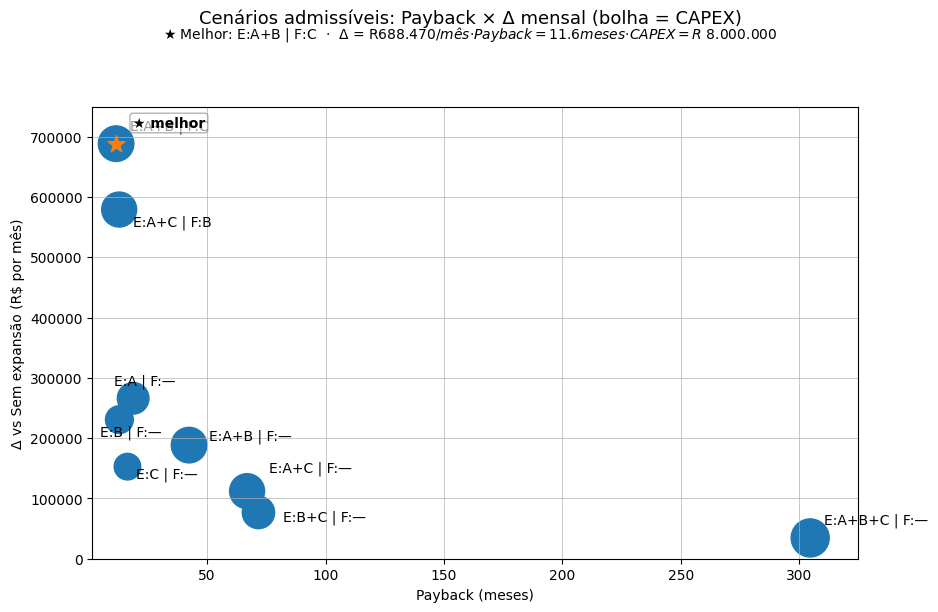

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df = df_admissiveis.copy()

# --- helpers ---
def _pb_num(v):
    if isinstance(v, str) and v.strip().lower().startswith('inf'):
        return np.inf
    return float(v)

def _fmt(s):  # rótulos compactos
    return s.replace(',', '+')

df['pb_num'] = df['Payback (meses)'].map(_pb_num)

# Tamanho das bolhas ~ sqrt(CAPEX) para reduzir contraste visual
capex = df['CAPEX (R$)'].astype(float)
sizes = np.sqrt(capex / capex.max()) * 750  # ajuste fino

x = df['pb_num'].to_numpy()
y = df['Δ vs Sem expansão (R$)'].to_numpy()
labels = [f"E:{_fmt(e)} | F:{_fmt(f)}" for e, f in zip(df['Expandir'], df['Fechar'])]

best = df.iloc[0]

# --------------------- PLOT ---------------------
fig, ax = plt.subplots(figsize=(9.5, 6.2))  # tamanho moderado

# Título e subtítulo separados do eixo
fig.suptitle("Cenários admissíveis: Payback × Δ mensal (bolha = CAPEX)", fontsize=13, y=0.98)
sub = (f"★ Melhor: E:{_fmt(best['Expandir'])} | F:{_fmt(best['Fechar'])}  ·  "
       f"Δ = R$ {best['Δ vs Sem expansão (R$)']:,.0f}/mês  ·  "
       f"Payback = {best['Payback (meses)']} meses  ·  "
       f"CAPEX = R$ {int(best['CAPEX (R$)']):,}").replace(',', '.')
fig.text(0.5, 0.955, sub, ha='center', va='top', fontsize=10)

# Dispersão
ax.scatter(x, y, s=sizes)
offsets = [(10,10), (10,-12), (-14,10), (-14,-12), (14,4), (6,-8), (16,14), (18,-6)]
for i, (xi, yi, lab) in enumerate(zip(x, y, labels)):
    dx, dy = offsets[i % len(offsets)]
    ax.annotate(lab, (xi, yi), xytext=(dx, dy), textcoords='offset points')

# Destaque do melhor (dentro do gráfico, canto superior esquerdo)
ax.scatter([best['pb_num']], [best['Δ vs Sem expansão (R$)']], s=160, marker='*', zorder=3)
ax.annotate("★ melhor", xy=(best['pb_num'], best['Δ vs Sem expansão (R$)']),
            xytext=(12, 12), textcoords='offset points', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.2", fc="w", ec="0.5", alpha=0.6))

# Eixos e grade
ax.set_xlabel('Payback (meses)')
ax.set_ylabel('Δ vs Sem expansão (R$ por mês)')
ax.grid(True, linewidth=0.5)
ax.ticklabel_format(axis='y', style='plain')

# Margens para “respirar”
finite_x = x[np.isfinite(x)]
ax.set_xlim(left=max(0, finite_x.min() - 10), right=finite_x.max() + 20)
ax.set_ylim(bottom=max(0, y.min() - 50_000), top=y.max() + 60_000)

# Reserva espaço para títulos (evita embolar)
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()


Rodamos, de forma exaustiva, todas as combinações de expandir (+60% de capacidade) e fechar fábricas, mantendo somente os cenários que atendem 100% da demanda projetada para 5 anos. A alocação de volumes prioriza a contribuição unitária (receita líquida menos frete e custo variável ajustado por sucata) e respeita as restrições de demanda e de capacidade.

$$
\sum_f x_{p,f} = \text{Demanda}_p
\qquad
\sum_p x_{p,f} \le \text{CapacidadeEntregável}_f
$$

Contribuição unitária do produto \(p\) na fábrica \(f\):

$$
\text{Contrib}_{p,f}
= \text{Preço}_p\,(1-\text{ICMS}_f)
- \text{Frete}_p
- \frac{\text{CV}_{p,f}}{1-\text{Desc}_f}
$$

Lucro mensal do cenário (com alocação \(x\)):

$$
\text{Lucro}(x) =
\sum_{p,f} x_{p,f}\,\text{Contrib}_{p,f}
- \sum_f \text{Fixos}_f
$$

Definimos um baseline “sem expansão/fechamento” com lucro \(\text{Lucro}_{\text{base}}\). O ganho incremental mensal (Δ) reportado é:

$$
\Delta =
\big(\text{Lucro}_{\text{cen}} - \text{FolhaExtra}_{\text{cen}} + \text{FixosFechados}_{\text{cen}}\big)
- \text{Lucro}_{\text{base}}
$$

CAPEX do cenário (soma dos investimentos nas fábricas expandidas):

$$
\text{CAPEX} = \sum_{f \in \text{expandidas}} \text{CAPEX}_f
$$

Payback (meses):

$$
\text{Payback} = \frac{\text{CAPEX}}{\Delta}
\quad \text{(válido quando } \Delta > 0 \text{)}
$$

Critério de seleção usado: (1) maximizar \(\Delta\); (2) em caso de empate, minimizar o payback; (3) persistindo empate, minimizar o CAPEX.
Conclusão técnica: entre os cenários admissíveis (100% da demanda atendida), o melhor foi **expandir A + B e fechar C**. Os resultados numéricos são:

$$
\Delta \approx \mathrm{R}\$\,688{,}470 \;\text{por mês}
$$

$$
\mathrm{CAPEX} \approx \mathrm{R}\$\,8{,}000{,}000
$$

$$
\mathrm{Payback} \approx 11{,}6 \;\text{meses}
$$

Esse resultado decorre da realocação ótima de volumes para plantas com melhor *unit economics* e da economia de fixos do encerramento de C, sem perda de atendimento.
